In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('AirQuality.csv', sep=';')
df.isnull().sum()
print(df.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [5]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


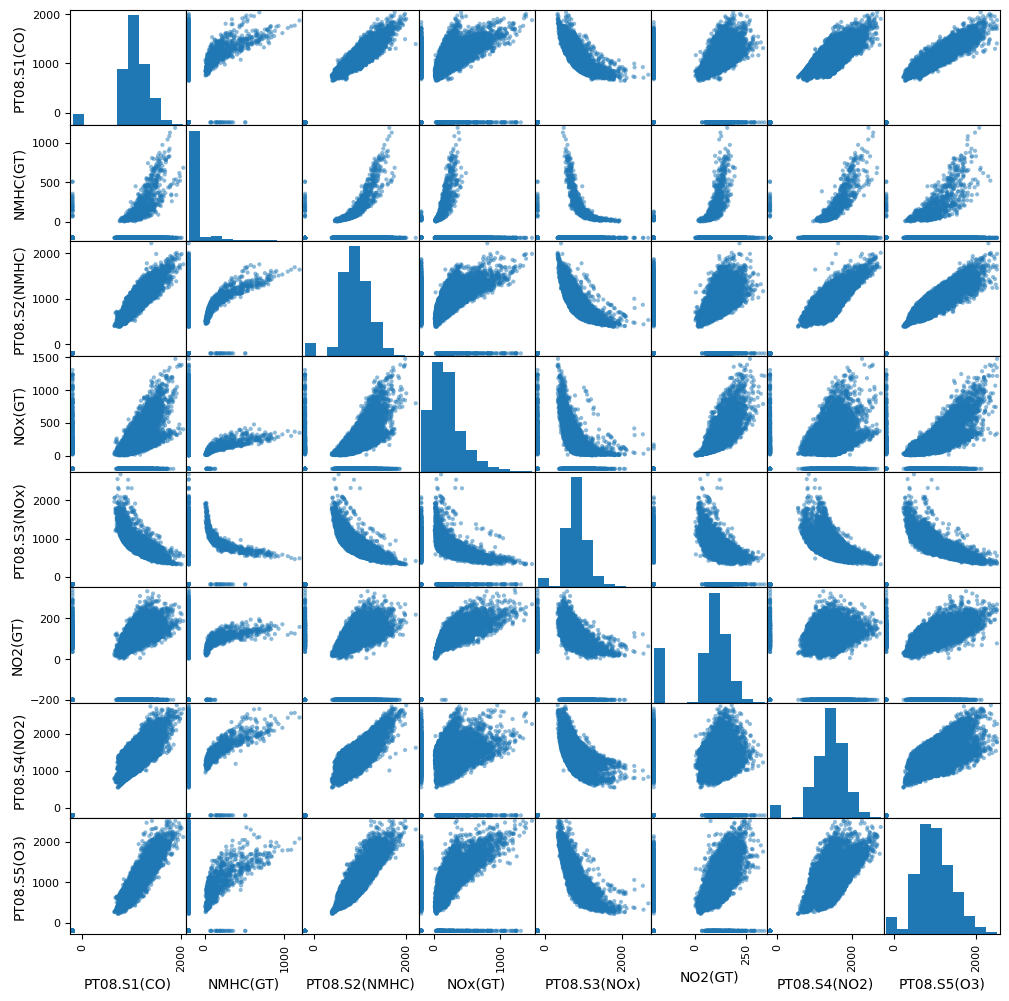

In [16]:
# Select only numeric columns and remove empty columns
numeric_df = df[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
				 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

# Create scatter matrix plot
pd.plotting.scatter_matrix(numeric_df, figsize=(12,12));

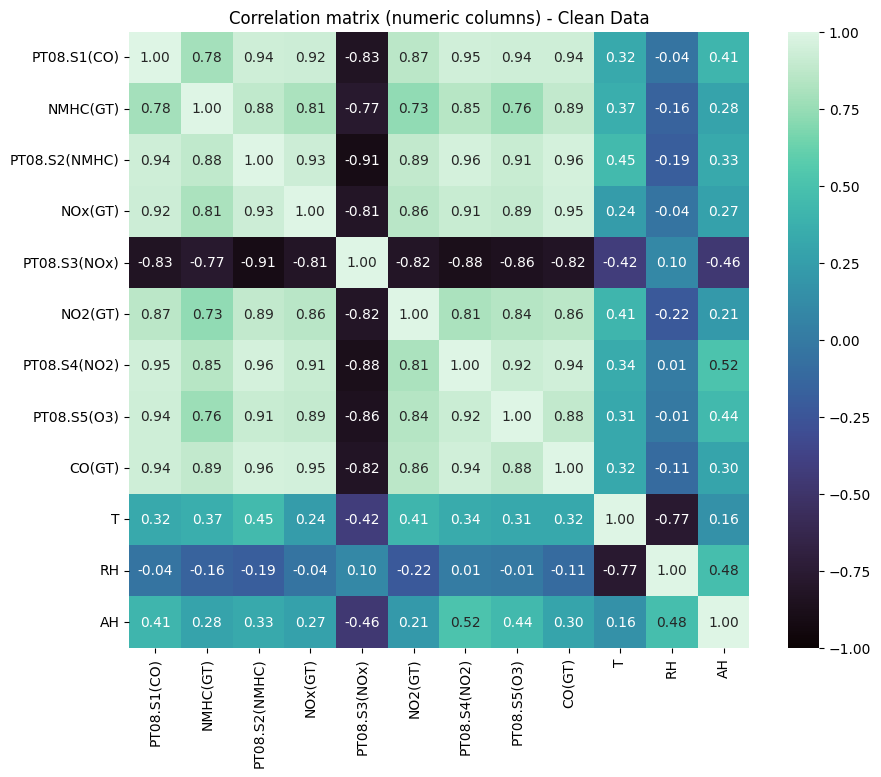


Estadísticas de la limpieza:
Número de registros original: 9471
Número de registros después de limpieza: 827
Porcentaje de datos conservados: 8.73%

Número de valores eliminados por columna:
PT08.S1(CO)       480
NMHC(GT)         8557
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
CO(GT)           1797
T                 480
RH                480
AH                480
dtype: int64


In [32]:

# 1. Primero convertimos las columnas a numéricas y reemplazamos -200 con np.nan
numeric_columns = ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
                  'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                  'CO(GT)', 'T', 'RH', 'AH']

# Convertir y limpiar datos
df_num = df[numeric_columns].apply(
    lambda col: pd.to_numeric(col.astype(str).str.replace(',', '.', regex=False), errors='coerce')
)

# Reemplazar -200 con np.nan
df_num = df_num.replace(-200, np.nan)

# Eliminar filas con valores nulos
df_clean = df_num.dropna()

# Crear visualización actualizada
plt.figure(figsize=(10, 8))
corr = df_clean.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, cmap="mako", annot=True, fmt=".2f")
plt.title("Correlation matrix (numeric columns) - Clean Data")
plt.show()

# Mostrar estadísticas de la limpieza
print("\nEstadísticas de la limpieza:")
print(f"Número de registros original: {len(df_num)}")
print(f"Número de registros después de limpieza: {len(df_clean)}")
print(f"Porcentaje de datos conservados: {(len(df_clean)/len(df_num))*100:.2f}%")

# Mostrar el número de valores -200 que fueron reemplazados por columna
valores_eliminados = df_num.isna().sum()
print("\nNúmero de valores eliminados por columna:")
print(valores_eliminados)

In [30]:
df_num.corr()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),CO(GT),T,RH,AH
PT08.S1(CO),1.000000,0.170007,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.041411,0.754844,0.745375,0.764903
NMHC(GT),0.170007,1.000000,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,0.128351,-0.000009,0.008284,0.012500
PT08.S2(NMHC),0.933102,0.110104,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.029926,0.669025,0.585803,0.646572
NOx(GT),0.277993,-0.004427,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,0.526451,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),0.087019,0.048821,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,-0.089981,0.588111,0.573549,0.621618
NO2(GT),0.154030,0.103307,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,0.671127,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),0.845149,0.162680,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,-0.073724,0.755060,0.640707,0.691913
PT08.S5(O3),0.892434,0.101185,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.080310,0.503700,0.524955,0.519467
CO(GT),0.041411,0.128351,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,1.000000,-0.068939,-0.048227,-0.045892
T,0.754844,-0.000009,0.669025,-0.138452,0.588111,-0.084104,0.755060,0.503700,-0.068939,1.000000,0.885911,0.981001


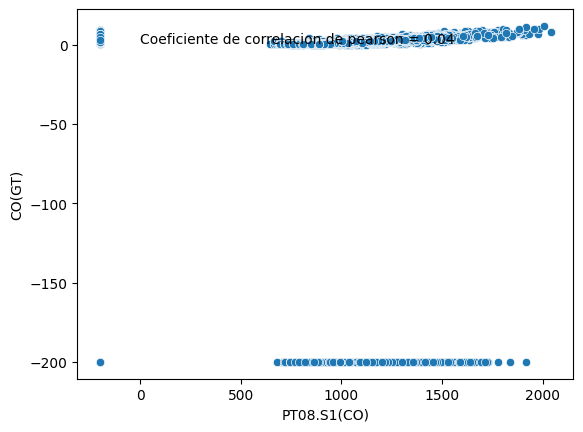

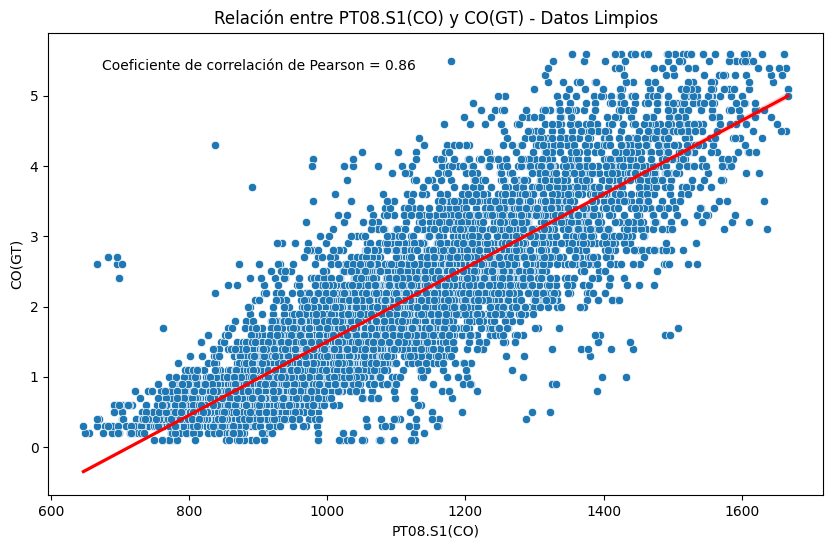


Estadísticas de la limpieza:
Número de registros original: 9471
Número de registros después de limpieza: 7126
Coeficiente de correlación original: 0.04
Coeficiente de correlación después de limpieza: 0.86


In [28]:
ax = sns.scatterplot(data=df_num, x='PT08.S1(CO)', y='CO(GT)')
coef = df_num['PT08.S1(CO)'].corr(df_num['CO(GT)'])
plt.text(0.07,0.92, f'Coeficiente de correlacion de pearson = {coef:.2f}')

# eliminacion de valores atípicos usando IQR (Rango Intercuartil)
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definicion de límites para valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Reemplazamos valores atípicos con NaN
        df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), col] = np.nan
    
    return df_clean

# limpieza de los datos
columns_to_clean = ['PT08.S1(CO)', 'CO(GT)']
df_clean = remove_outliers(df_num, columns_to_clean)

# Eliminacion de filas con valores NaN
df_clean = df_clean.dropna(subset=columns_to_clean)

# nuevo scatter plot con datos limpios
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_clean, x='PT08.S1(CO)', y='CO(GT)')

# 5. Calculamos nuevo coeficiente de correlación
new_coef = df_clean['PT08.S1(CO)'].corr(df_clean['CO(GT)'])

# 6. Añadimos línea de regresión
sns.regplot(data=df_clean, x='PT08.S1(CO)', y='CO(GT)', scatter=False, color='red')

plt.title('Relación entre PT08.S1(CO) y CO(GT) - Datos Limpios')
plt.text(0.07, 0.92, f'Coeficiente de correlación de Pearson = {new_coef:.2f}', 
        transform=ax.transAxes)
plt.show()

# estadísticas antes y después
print("\nEstadísticas de la limpieza:")
print(f"Número de registros original: {len(df_num)}")
print(f"Número de registros después de limpieza: {len(df_clean)}")
print(f"Coeficiente de correlación original: {coef:.2f}")
print(f"Coeficiente de correlación después de limpieza: {new_coef:.2f}")

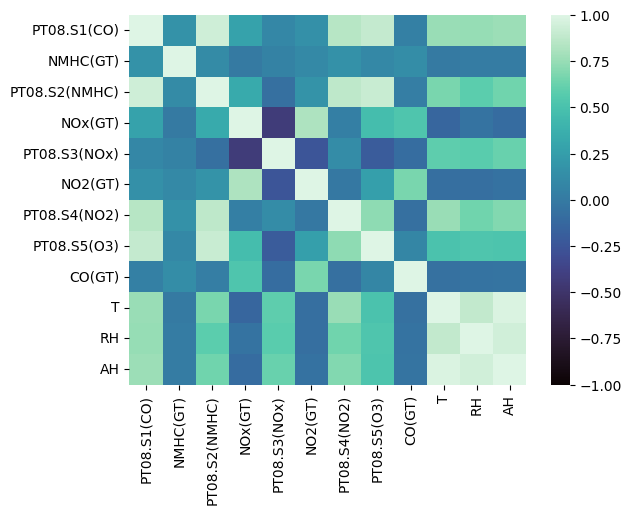

In [29]:
ax = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, cmap="mako");